# Simulation and Measurement Pipeline
This notebook demonstrates how to run a 2D diffusion simulation and make spatial/temporal measurements at specified coordinates.

In [40]:
import numpy as np
from diffusion_sim import DiffusionSimulator
from measurement import make_measurements
import os

In [41]:
# Set up and run the simulation
sim = DiffusionSimulator(grid_size=(100, 100), dt=0.1, diff_a=0.5, diff_b=1.0, steps=1000, a_external=10.0, b_external=5.0)
a_hist, b_hist = sim.run(steps=100000, save_interval=100)

In [42]:
# Define measurement coordinates and interval
coords = [(x, y) for x in range(10, 90, 20) for y in range(10, 90, 20)]

n = 10  # Take every 10th timepoint

# Make measurements for chemical A and B
meas_a = make_measurements(a_hist, coords, n=n)
meas_b = make_measurements(b_hist, coords, n=n)

print("Measurements for chemical A:", meas_a.shape)
print("Measurements for chemical B:", meas_b.shape)

Measurements for chemical A: (100, 16)
Measurements for chemical B: (100, 16)


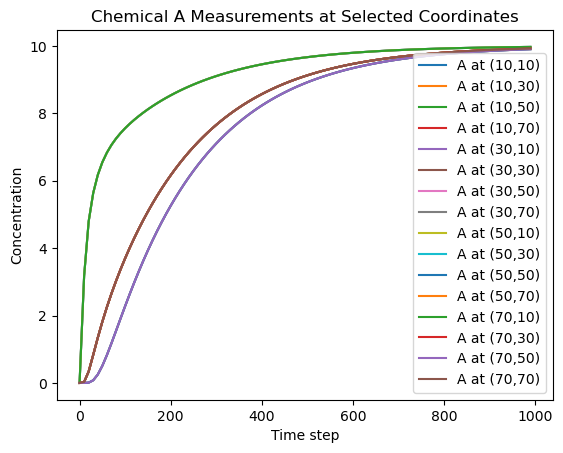

In [43]:
# Visualize measurements for chemical A at each coordinate
import matplotlib.pyplot as plt
for i, (x, y) in enumerate(coords):
    plt.plot(np.arange(meas_a.shape[0]) * n, meas_a[:, i], label=f"A at ({x},{y})")
plt.xlabel("Time step")
plt.ylabel("Concentration")
plt.title("Chemical A Measurements at Selected Coordinates")
plt.legend()
plt.show()

In [ ]:
# Save measurements and positions
os.makedirs("../data/measurements/", exist_ok=True)
np.savez_compressed(
    "../data/measurements/measurements_a.npz",
    measurements=meas_a,
    coords=np.array(coords),
    n=n
)
np.savez_compressed(
    "../data/measurements/measurements_b.npz",
    measurements=meas_b,
    coords=np.array(coords),
    n=n
)
print("Saved measurements for A and B to ../data/measurements/")

Saved measurements for A and B to ../data/measurements/
